<a href="https://colab.research.google.com/github/blibbliblo/LinearRegressionModel/blob/main/SalaryLinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krishnaraj30/salary-prediction-data-simple-linear-regression")

print("Path to dataset files:", path)

100%|██████████| 734/734 [00:00<00:00, 970kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/krishnaraj30/salary-prediction-data-simple-linear-regression/versions/2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
training_set = pd.read_csv(f"{path}/Salary_Data.csv")

x_train = training_set["YearsExperience"].values
y_train = training_set["Salary"].values

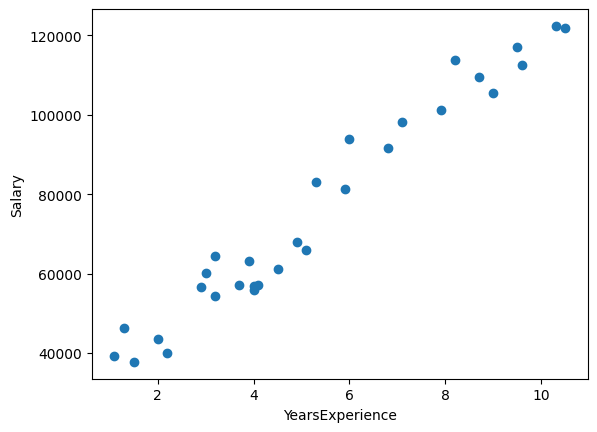

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [5]:
def cost_function(x, y, w, b):
    m = len(x)
    cost_sum = 0

    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i]) ** 2
        cost_sum += cost

    total_cost = (1/(2*m)) * cost_sum
    return total_cost

In [6]:
def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w * x[i] + b

        dc_dw += (f - y[i]) * x[i]
        dc_db += (f - y[i])

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db

    return dc_dw, dc_db

In [12]:
def gradient_descent(x, y, alpha, iterations):
    w = 0
    b = 0

    for i in range(iterations):
        dc_dw, dc_db = gradient_function(x, y, w, b)

        w = w - alpha * dc_dw
        b = b - alpha * dc_db

        # print(f"Iteration {i}: Cost {cost_function(x, y, w, b)}")

    return w, b

In [8]:
learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

print(f"w: {final_w:.4f}, b: {final_b:.4f}")

w: 9449.9623, b: 25792.2002


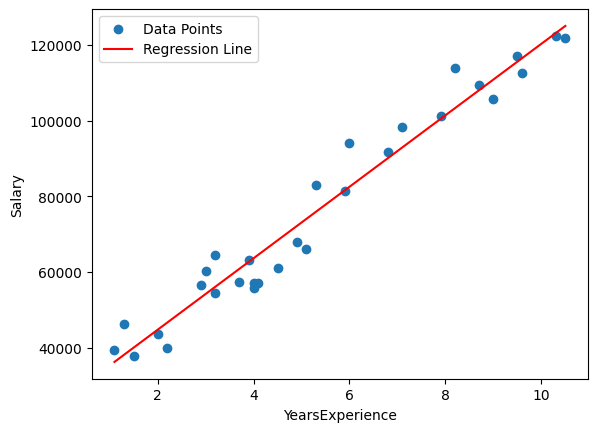

In [9]:
plt.scatter(x_train, y_train, label='Data Points')

x_vals = np.linspace(min(x_train), max(x_train), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()